In [105]:
import numpy as np
import pandas as pd

In [106]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8

In [107]:
# considering only sales test file to perform ABC CLassification on SKU
sales = pd.read_csv('sales_test.csv', index_col=0)

In [108]:
sales.head()

,Order Date,Line No,Ship To Address No,Item Code,Order Qty,Quantity Shipped
Order No,,,,,,
528758,2017-01-03,1,1358538.0,111931,70.0,70.0
528791,2017-01-03,1,1254798.0,1029071,10.0,10.0
528791,2017-01-03,2,1254798.0,1033341,10.0,10.0
528791,2017-01-03,3,1254798.0,1040827,5.0,5.0
528791,2017-01-03,4,1254798.0,10106111,10.0,10.0


In [109]:
print(f"total order quantity: {sales['Order Qty'].sum()} and canceled quantity: {sales['Quantity Shipped'].sum()}")

total order quantity: 183235.0 and canceled quantity: 183235.0


In [110]:
len(sales['Item Code'].unique())

64

# Steps followed for ABC classification:

> 1.List each unique product (with its item code / SKU) after sorting and totaling up the order quantity values.

> 2.Sort the values of the series in descending order according to order quantity value.

> 3.Translate each item and its order quantity into the fraction or percentage of the cumulative total.

> 4.Divide the items into A, B, and C classes where A are the product which have cumsum avg less than 80%, B have cumsum avg between 80-95% and C have cumsum avg greater than 95%

In [111]:
# performing Step 1
Groupby_qty = sales['Order Qty'].groupby(sales['Item Code'], sort = True).sum()
Groupby_qty.head()

Item Code
110441      9600.0
111931     15575.0
113106       908.0
1029069      188.0
1029070      443.0
Name: Order Qty, dtype: float64

In [112]:
#performing Step 2
Value_Series = pd.DataFrame(Groupby_qty.sort_values(ascending  = False))
Value_Series.head()

,Order Qty
Item Code,
10098739,27173.0
111931,15575.0
1041106,13178.0
1040765,11980.0
110441,9600.0


In [113]:
# Performing Step 3
Value_Series = Value_Series.cumsum()/Value_Series.sum()
Value_Series.head()

,Order Qty
Item Code,
10098739,0.148296
111931,0.233296
1041106,0.305215
1040765,0.370595
110441,0.422987


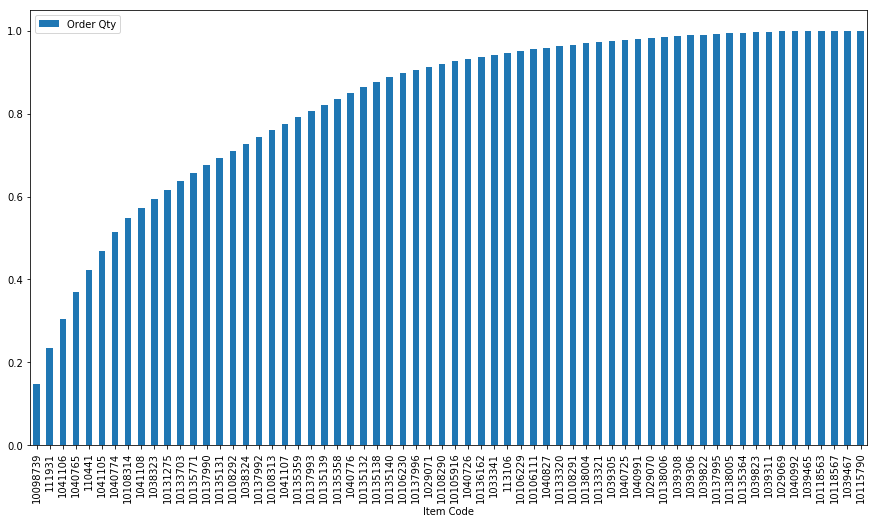

In [114]:
Value_Series.plot(kind='bar')

In [115]:
# just to check the results of cumsum avg
cumsumavg =  [x[0] for x in Value_Series.values.tolist()]
[print(cumsumavg[x]) for x in range(5)]
#cumsumavg

0.14829590416678037
0.23329604060359646
0.30521461511174175
0.37059513739187383
0.42298687477829017


[None, None, None, None, None]

In [116]:
# performing step 4
classified = pd.DataFrame(["A" if x[0] < 0.8 else "B" if ((x[0] > 0.8) and (x[0] < 0.95)) else "C" for x in Value_Series.values.tolist()])
classified.head()

,0
0,A
1,A
2,A
3,A
4,A


In [117]:
#mapping ABC classification values with item code
classified.index = Value_Series.index
classified.columns = ['value']

In [118]:
#Checking the item codes and classes
print(classified.head())
print(classified.tail())

          value
Item Code      
10098739      A
111931        A
1041106       A
1040765       A
110441        A
          value
Item Code      
1039465       C
10118563      C
10118567      C
1039467       C
10115790      C


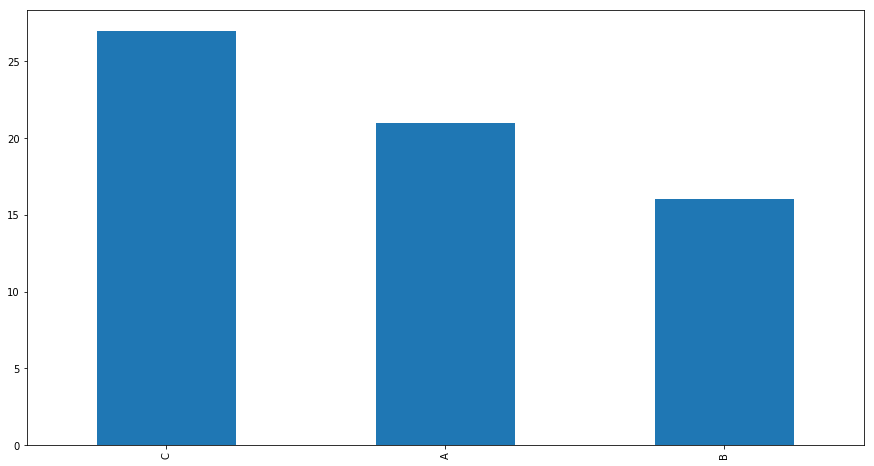

In [119]:
classified['value'].value_counts().plot(kind='bar')

### From above graph we can clearly see that most of clients fall under Category C which is aroun 28 from 64 unque clients. Around 20 clients fall under A category and remaining around 16 cleints fall in A category

In [120]:
# saving the output to a file
classified.to_csv("ABC_classification_SKU_Sales.csv")